# Welcome to Iris Classification

### Import all dependencies

In [1]:
pip install pydot==1.3.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz==0.10.1

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras import callbacks

### Import Training data

In [4]:
df = pd.read_csv('Iris.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Preprocessing

#### Replace Label name into 0 and 1

In [7]:
df = df.drop(columns='Id')

#### Hot Encoding

In [8]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


#### Replace the label with Hot Encoded one

In [9]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


#### Assign as Dataset

In [10]:
dataset = new_df.values

#### Assign the Label and Feature

In [11]:
X = dataset[:,0:4]

In [12]:
y = dataset[:,4:7]

#### Normalization

In [13]:
# Normalization
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

#### Training Testing Split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

To Avoid Error ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float)

In [15]:
X_train, X_test, Y_train, Y_test = X_train.astype('float64'), X_test.astype('float64'), Y_train.astype('float64'), Y_test.astype('float64')

### Create the model

1. 2 Layer with 64 unit of Relu and 1 layer with 3 unit of softmax
2. input shape = nx4 array
3. Softmax turn logit into probability

In [16]:
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='softmax'),])

##### Create the loss and optimizer function

1. Adam Optimizer => replacement optimization algorithm for stochastic gradient descent 
2. binary cross entropy as loss function => used for multi-class classification
3. metrics to benchmark is accuracy

In [17]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________
None


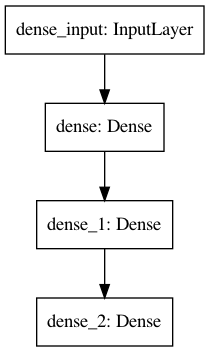

In [19]:
plot_model(model, to_file='04-iris-classification.png')

### Create Callback

In [20]:
class myCallback(callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nYour Accuracy >90%!")
      self.model.stop_training = True

In [21]:
callbacks = myCallback()

### Fit the model and Save the History

In [22]:
hist = model.fit(X_train, Y_train, epochs=100, callbacks=[callbacks])

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1190 - accuracy: 0.3238
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0694 - accuracy: 0.3238
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0287 - accuracy: 0.2571
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9935 - accuracy: 0.4667
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9630 - accuracy: 0.6667
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9357 - accuracy: 0.6762
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9077 - accuracy: 0.6762
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8787 - accuracy: 0.6762
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8490 - accuracy: 0.6762
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8181 - accuracy: 0.6762
Epoch 11/100
4/4 [===========

### Test Model

In [23]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.9111


[0.34341272711753845, 0.9111111164093018]

### Plotting

In [24]:
import matplotlib.pyplot as plt

#### Plot Model Loss

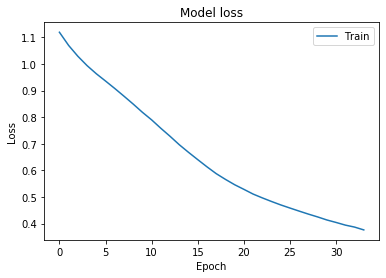

In [25]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

#### Plot Model Accuracy

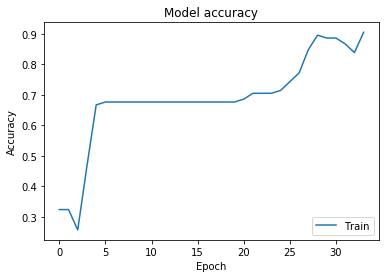

In [26]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()